<a href="https://colab.research.google.com/github/rkarthiksub/MachineLearningNotebooks/blob/master/Day_2_LLM_Workbook_Workshop_April_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important components
1. Dataset: for LLMs datasets come with billions to trillions of tokens. Hence pretraining/complete training of a large model is very expensive and time consuming.
- Training is done in clusters, in distributed manner.
- Trainer API (from HF): can automate training of large models over distributed resources.
2. Finetuning: Even a pretrained model needs dataset that is used for fine tuning the model for a specific task/domain.

2. Tokenize:
- Normalization: upper cases to lower cases etc.
- Pre-tonization: split the words
- Tokenization algorithm:

3. Transformer Model:
- You may have task/problem that you would like to solve it quickly. This can be accomplished by downloading a model from HF and fine tuning it. HF has connected researchers and developers to share and use their solutions.

### Why PyTorch and HF?

1. Pythonic
2. Huge support from HF (https://huggingface.co/docs/transformers/en/index)
3. Trainer API only supports PyTorch.
4. Huge community support.


# Should I train a model from end to end?

GPT-3 paper: https://arxiv.org/pdf/2005.14165
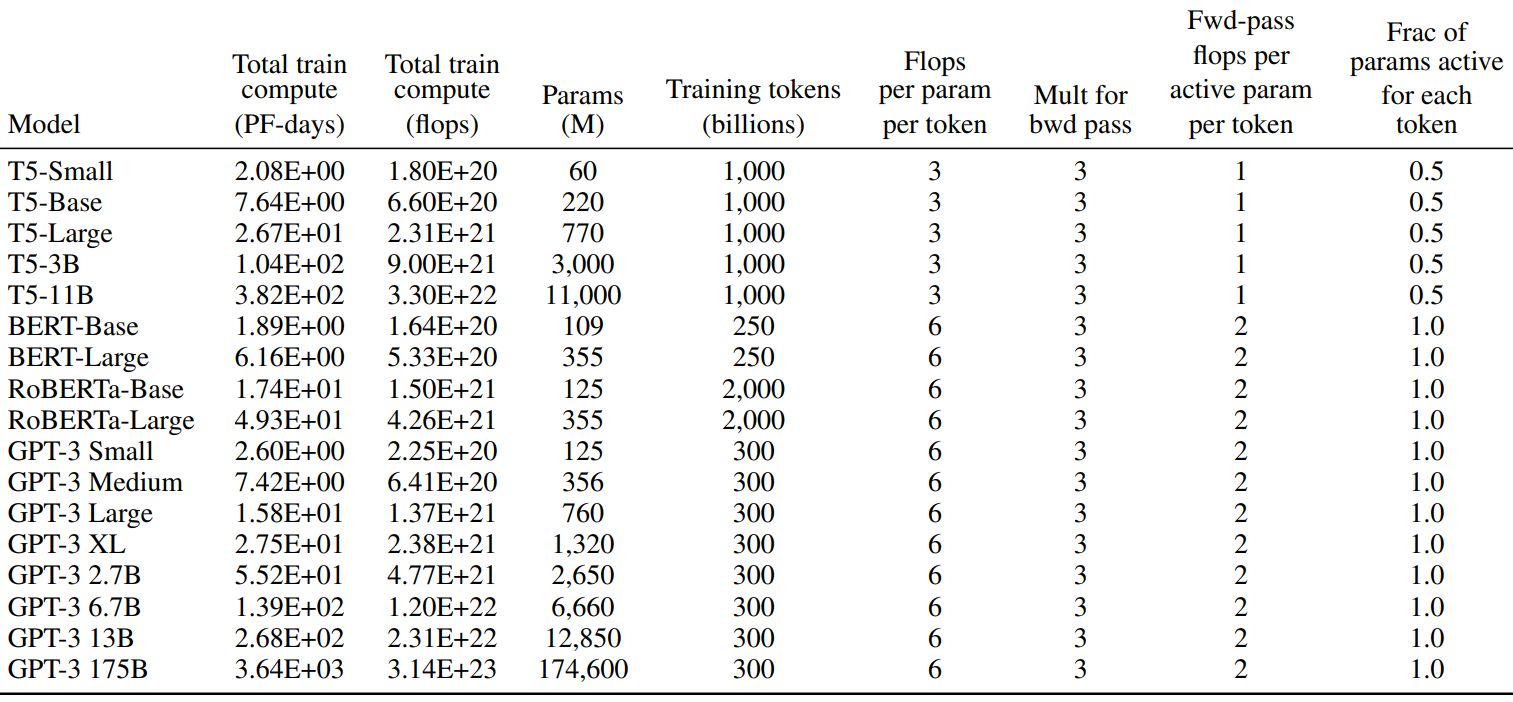

In [ ]:
t5_base=6.6e20
PC_capacity = 100e9

t5_base/PC_capacity/(60*24*30)

152777.77777777778

# Hugging Face Tour
- Datasets
- Models
- Spaces
- Paid services

# Import the modules

In [ ]:
from pprint import pprint
from transformers import AutoTokenizer, pipeline
import transformers
import torch

#### A smple input

In [ ]:
input_text = ["India landed on the moon bringing great joy to the nation and surprise to everyone else",
              "I am not feeling well today",
              "India has the most number of deaths in the world."]

#### Choose the model from HF hub

In [ ]:
# model_checkpoint = "distilbert-base-uncased"
model_checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

# use auto-tokenizer api to get the tokenizer for the model
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

#### What is the vocab size?

In [ ]:
#print size of the vocab
tokenizer.vocab_size

30522

In [ ]:
# are there any special/added tokens
tokenizer.get_added_vocab()

{'[PAD]': 0, '[UNK]': 100, '[CLS]': 101, '[SEP]': 102, '[MASK]': 103}

##### Looking inside the downloaded files

In [ ]:
!ls -lah /

total 456K
drwxr-xr-x   1 root root 4.0K Apr 22 14:41 .
drwxr-xr-x   1 root root 4.0K Apr 22 14:41 ..
lrwxrwxrwx   1 root root    7 Jun 27  2024 bin -> usr/bin
drwxr-xr-x   2 root root 4.0K Apr 18  2022 boot
drwxr-xr-x   1 root root 4.0K Apr 17 13:36 content
-rw-r--r--   1 root root 4.3K Jul 10  2024 cuda-keyring_1.1-1_all.deb
drwxr-xr-x   1 root root 4.0K Apr 17 13:48 datalab
drwxr-xr-x   5 root root  360 Apr 22 14:41 dev
-rwxr-xr-x   1 root root    0 Apr 22 14:41 .dockerenv
drwxr-xr-x   1 root root 4.0K Apr 22 14:41 etc
drwxr-xr-x   2 root root 4.0K Apr 18  2022 home
drwxr-xr-x   3 root root 4.0K Apr 22 14:41 kaggle
lrwxrwxrwx   1 root root    7 Jun 27  2024 lib -> usr/lib
lrwxrwxrwx   1 root root    9 Jun 27  2024 lib32 -> usr/lib32
lrwxrwxrwx   1 root root    9 Jun 27  2024 lib64 -> usr/lib64
lrwxrwxrwx   1 root root   10 Jun 27  2024 libx32 -> usr/libx32
drwxr-xr-x   2 root root 4.0K Jun 27  2024 media
drwxr-xr-x   2 root root 4.0K Jun 27  2024 mnt
-rw-r--r--   1 root root  17K Ju

In [ ]:
# find the path where model's files are downloaded
!find / -iname "config.json"

find: ‘/proc/64/task/64/net’: Invalid argument
find: ‘/proc/64/net’: Invalid argument
/root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/714eb0fa89d2f80546fda750413ed43d93601a13/config.json
/root/.julia/packages/TiffImages/w9Bbj/docs/demos/config.json
/usr/local/lib/python3.11/dist-packages/zmq/utils/config.json
/tools/google-cloud-sdk/lib/googlecloudsdk/core/config.json


In [ ]:
# explore the folder
!ls /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english -lh

total 12K
drwxr-xr-x 2 root root 4.0K Apr 22 14:42 blobs
drwxr-xr-x 2 root root 4.0K Apr 22 14:42 refs
drwxr-xr-x 3 root root 4.0K Apr 22 14:42 snapshots


In [ ]:
!ls -l /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/

total 4
drwxr-xr-x 2 root root 4096 Apr 22 14:42 714eb0fa89d2f80546fda750413ed43d93601a13


In [ ]:
!head -9000 /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs/fb140275c155a9c7c5a3b3e0e77a9e839594a938|tail

virtually
gen
gravity
exploration
amber
vital
wishes
powell
doctrine
elbow


In [ ]:
# look at model's config
!cat /root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/714eb0fa89d2f80546fda750413ed43d93601a13/config.json


{
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "vocab_size": 30522
}


In [ ]:
# let's look at the vocabulary of this model


In [ ]:
# let's look at some random tokens


#### Tokenize the input

In [ ]:
# tokenize the input text and print the output
tokenized_text = tokenizer(['hello','how are you','pneumonoultramicroscopicsilicovolcanoconiosis'])

In [ ]:
pprint(tokenized_text)

{'attention_mask': [[1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101, 7592, 102],
               [101, 2129, 2024, 2017, 102],
               [101,
                1052,
                2638,
                2819,
                17175,
                11314,
                6444,
                2594,
                7352,
                26461,
                27572,
                11261,
                6767,
                15472,
                6761,
                8663,
                10735,
                2483,
                102]]}


In [ ]:
# what is the type of the output
pprint(tokenized_text)
type(tokenized_text)

{'attention_mask': [[1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101, 7592, 102],
               [101, 2129, 2024, 2017, 102],
               [101,
                1052,
                2638,
                2819,
                17175,
                11314,
                6444,
                2594,
                7352,
                26461,
                27572,
                11261,
                6767,
                15472,
                6761,
                8663,
                10735,
                2483,
                102]]}


transformers.tokenization_utils_base.BatchEncoding

##### Are there any special tokens?

In [ ]:
# print special tokens
tokenizer.convert_ids_to_tokens([101,102])

['[CLS]', '[SEP]']

In [ ]:
# can we print the tokens with specific token ids?
tokenizer.convert_ids_to_tokens( [101,
                1052,
                2638,
                2819,
                17175,
                11314,
                6444,
                2594,
                7352,
                26461,
                27572,
                11261,
                6767,
                15472,
                6761,
                8663,
                10735,
                2483,
                102])

['[CLS]',
 'p',
 '##ne',
 '##um',
 '##ono',
 '##ult',
 '##ram',
 '##ic',
 '##ros',
 '##copic',
 '##sil',
 '##ico',
 '##vo',
 '##lc',
 '##ano',
 '##con',
 '##ios',
 '##is',
 '[SEP]']

#### Get tokens from token ids of the input

In [ ]:
# convert tokens to original text


#### Is there any relation between token ids and vocab file?

In [ ]:
import pandas as pd

In [ ]:
# load the vocab file as a pandas series
vocab = pd.Series(open('/root/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/blobs/fb140275c155a9c7c5a3b3e0e77a9e839594a938').readlines())

In [ ]:
vocab.loc[102]

'[SEP]\n'

In [ ]:
# explore if the tokens and the token ids match with this file


#### Can we pass the input token ids to a model? Is their type correct?

In [ ]:
# convert the output to appropriate format
tokenized_text = tokenizer(input_text,
                           padding=True,
                           return_tensors='pt')

In [ ]:
pprint(tokenized_text)

{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]]),
 'input_ids': tensor([[ 101, 2634, 5565, 2006, 1996, 4231, 5026, 2307, 6569, 2000, 1996, 3842,
         1998, 4474, 2000, 3071, 2842,  102],
        [ 101, 1045, 2572, 2025, 3110, 2092, 2651,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [ 101, 2634, 2038, 1996, 2087, 2193, 1997, 6677, 1999, 1996, 2088, 1012,
          102,    0,    0,    0,    0,    0]])}


In [ ]:
tokenizer.convert_ids_to_tokens([ 101, 1045, 2572, 2025, 3110, 2092, 2651,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0])

['[CLS]',
 'i',
 'am',
 'not',
 'feeling',
 'well',
 'today',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

#### What is the type of padding used, dynamic or static?

#### If you are writing your custom tokenizer, what should be the format/type of its output?

#### How to pass the input to the model?

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained(model_checkpoint)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

#### How to see model's architecture?

In [ ]:
# print model architecture
pprint(model)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [ ]:
# print embeddings
model.state_dict()

OrderedDict([('embeddings.word_embeddings.weight',
              tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
                      [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
                      [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
                      ...,
                      [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
                      [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
                      [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]])),
             ('embeddings.position_embeddings.weight',
              tensor([[ 1.8007e-02, -2.3798e-02, -3.5982e-02,  ...,  4.5726e-04,
                        5.1363e-05,  1.5002e-02],
                      [ 7.8592e-03,  4.8144e-03, -1.6093e-02,  ...,  2.9312e-02,
                        2.7634e-02, -8.5431e-03],
                      [-1.1663e-02, -3.1590e-03, -9.4000e-03,  ...,  1.4870e-02,
                 

#### How to see model's configuration?

In [ ]:
pprint(model.config)

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "vocab_size": 30522
}



#### How many parameters are there in the model and what is its size?

In [ ]:
# fill ??
print("No. of parameters in the model:", model.num_parameters())

No. of parameters in the model: 66362880


In [ ]:
print("Size of the model", model.num_parameters()*4/10**6)

Size of the model 265.45152


#### How to get output form the model?

In [ ]:
model(**tokenized_text)

BaseModelOutput(last_hidden_state=tensor([[[ 0.6786,  0.2116,  0.2134,  ...,  0.4311,  0.9219, -0.5872],
         [ 0.4083,  0.1110,  0.3373,  ...,  0.2122,  0.7986, -0.6584],
         [ 0.5258,  0.2334,  0.4273,  ..., -0.0329,  0.7275, -0.5175],
         ...,
         [ 0.7248,  0.2988,  0.3545,  ...,  0.4456,  1.0790, -0.5557],
         [ 0.6883,  0.2909,  0.3172,  ...,  0.4103,  1.0424, -0.7060],
         [ 1.1934,  0.1189,  0.5984,  ...,  0.4708,  0.7246, -0.8912]],

        [[-0.8214,  0.7480,  0.0973,  ..., -0.0457, -1.1065, -0.3524],
         [-0.8090,  0.7177,  0.2172,  ..., -0.1756, -0.9477, -0.2446],
         [-1.0262,  0.6648,  0.1837,  ..., -0.2497, -0.9956, -0.2826],
         ...,
         [-0.8590,  0.7709,  0.1200,  ..., -0.0781, -0.9487, -0.3195],
         [-0.8194,  0.7506,  0.0613,  ..., -0.0756, -0.9781, -0.3513],
         [-0.7707,  0.7625,  0.0414,  ..., -0.0674, -0.9842, -0.3520]],

        [[-0.3636,  0.2916, -0.3554,  ..., -0.5411,  0.0856, -0.0165],
         [-

#### Why is "NativeLayerNormBackward0" at the end? How to remove it?

In [ ]:
with torch.inference_mode():
  output=model(**tokenized_text)
  print(output)

BaseModelOutput(last_hidden_state=tensor([[[ 0.6786,  0.2116,  0.2134,  ...,  0.4311,  0.9219, -0.5872],
         [ 0.4083,  0.1110,  0.3373,  ...,  0.2122,  0.7986, -0.6584],
         [ 0.5258,  0.2334,  0.4273,  ..., -0.0329,  0.7275, -0.5175],
         ...,
         [ 0.7248,  0.2988,  0.3545,  ...,  0.4456,  1.0790, -0.5557],
         [ 0.6883,  0.2909,  0.3172,  ...,  0.4103,  1.0424, -0.7060],
         [ 1.1934,  0.1189,  0.5984,  ...,  0.4708,  0.7246, -0.8912]],

        [[-0.8214,  0.7480,  0.0973,  ..., -0.0457, -1.1065, -0.3524],
         [-0.8090,  0.7177,  0.2172,  ..., -0.1756, -0.9477, -0.2446],
         [-1.0262,  0.6648,  0.1837,  ..., -0.2497, -0.9956, -0.2826],
         ...,
         [-0.8590,  0.7709,  0.1200,  ..., -0.0781, -0.9487, -0.3195],
         [-0.8194,  0.7506,  0.0613,  ..., -0.0756, -0.9781, -0.3513],
         [-0.7707,  0.7625,  0.0414,  ..., -0.0674, -0.9842, -0.3520]],

        [[-0.3636,  0.2916, -0.3554,  ..., -0.5411,  0.0856, -0.0165],
         [-

In [ ]:
# what is the shape of the output
output.last_hidden_state.shape

torch.Size([3, 18, 768])

#### How to use the model for classification?

In [ ]:
# import model for classification
from transformers import AutoModelForSequenceClassification
cls_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

#### Compare this model with hte previous model

In [ ]:
# print this model with previous one
pprint(cls_model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
pprint(model)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

Classify the text

In [ ]:
output = cls_model(**tokenized_text)

In [ ]:
pprint(output)

SequenceClassifierOutput(loss=None,
                         logits=tensor([[-4.3472,  4.6557],
        [ 4.5186, -3.6110],
        [ 2.6655, -2.1722]], grad_fn=<AddmmBackward0>),
                         hidden_states=None,
                         attentions=None)


In [ ]:
prob_scores = torch.nn.functional.softmax(output.logits, dim =-1)

In [ ]:
prob_scores

tensor([[1.2304e-04, 9.9988e-01],
        [9.9971e-01, 2.9461e-04],
        [9.9214e-01, 7.8629e-03]], grad_fn=<SoftmaxBackward0>)

In [ ]:
labels=torch.argmax(prob_scores, dim = -1)

In [ ]:
labels

tensor([1, 0, 0])

In [ ]:
[cls_model.config.id2label[i] for i in labels.tolist()]

['POSITIVE', 'NEGATIVE', 'NEGATIVE']

# HF abstraction

In [ ]:
from transformers import TextClassificationPipeline
aclassifier = TextClassificationPipeline(model = cls_model, tokenizer =tokenizer)

Device set to use cpu


In [ ]:
aclassifier(input_text)

[{'label': 'POSITIVE', 'score': 0.9998769760131836},
 {'label': 'NEGATIVE', 'score': 0.9997053742408752},
 {'label': 'NEGATIVE', 'score': 0.9921371340751648}]

### pipeline - highest level of abstraction

In [ ]:
from transformers import pipeline

In [ ]:
classifier=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
classifier('Headphone worked only for 2 days, after that one stopped working')

[{'label': 'NEGATIVE', 'score': 0.9978426694869995}]

In [ ]:
generator = pipeline('text-generation')

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
generator("I will have to skip today's school because")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I will have to skip today's school because I'm not sure about my grades right now. This is what happens when it comes to class size.\n\nI am going to be taking a college degree after college and at 8th year I will"}]

In [ ]:
dir(generator)

['XL_PREFIX',
 '__abstractmethods__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_batch_size',
 '_create_repo',
 '_ensure_tensor_on_device',
 '_forward',
 '_forward_params',
 '_get_files_timestamps',
 '_load_feature_extractor',
 '_load_image_processor',
 '_load_processor',
 '_load_tokenizer',
 '_num_workers',
 '_parse_and_tokenize',
 '_postprocess_params',
 '_preprocess_params',
 '_sanitize_parameters',
 '_upload_modified_files',
 'assistant_model',
 'assistant_tokenizer',
 'binary_output',
 'call_count',
 'check_model_type',
 'default_input_names',
 'device',
 'device_placement',
 'ensure_tensor_on_device

In [ ]:
# generator

In [ ]:
dir(generator)

In [ ]:
generator = pipeline(model='distilgpt2')

In [ ]:
generator("I wish I could study longer")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I wish I could study longer, the long hours I went through during pre-game, making sure that I didn't turn into any shit but still, you know, let's talk about it. So I have a lot of respect to the people"}]

In [ ]:
unmask_model = pipeline('fill-mask')

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
unmask_model('My <mask> was so upset that I had to leave', top_k=5)

[{'score': 0.19247710704803467,
  'token': 3795,
  'token_str': ' mom',
  'sequence': 'My mom was so upset that I had to leave'},
 {'score': 0.10593901574611664,
  'token': 1141,
  'token_str': ' wife',
  'sequence': 'My wife was so upset that I had to leave'},
 {'score': 0.09318482130765915,
  'token': 25537,
  'token_str': ' roommate',
  'sequence': 'My roommate was so upset that I had to leave'},
 {'score': 0.08175527304410934,
  'token': 6096,
  'token_str': ' girlfriend',
  'sequence': 'My girlfriend was so upset that I had to leave'},
 {'score': 0.047272298485040665,
  'token': 4252,
  'token_str': ' dad',
  'sequence': 'My dad was so upset that I had to leave'}]